<a href="https://colab.research.google.com/github/yunhoyu/Melon_chart/blob/main/%EB%A9%9C%EB%A1%A0%EC%B0%A8%ED%8A%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **멜론차트 분석**

---




0.   *한글 폰트 설정*


1.   *데이터 수집*

   * *1-1 top100* <br>
   * *1-2 hot100* <br>
   * *1-3 month100* <br>


2.   *데이터 정제*


3.   *데이터 시각화*


4.   *결론*



# 0. 한글 폰트 설정


In [6]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv

## **1.데이터 수집**

1-1 top100

In [125]:
 #데이터 수집

def get_melon_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        #songs = soup.select('.d_song_list tbody tr')
        songs = soup.select('tbody > tr') #songs 설정으로 select 할 위치 선정

        data = []  # 데이터를 저장할 리스트

        for song in songs: # 각각 no, title, name, album 등을 페이지로부터 정보를 가져옴.
            no = song.select_one('.rank').get_text().strip()
            title = song.select_one('.ellipsis.rank01').get_text().strip()
            name = song.select_one('.ellipsis.rank02 > a').get_text().strip()
            album = song.select_one('.ellipsis.rank03').get_text().strip()

            data.append([no, title, name, album])

        return data
    else:
        print(f'Failed to retrieve data from {url}')
        return None

if __name__ == "__main__":
    # 첫 번째 페이지의 URL
    url = "https://www.melon.com/chart/index.htm"

    # URL에 대해 데이터 가져오기
    page_data = get_melon_data(url)
    if page_data:
        # CSV 파일 작성 (utf-8-sig 인코딩 방식으로 변경)
        with open('melon_top100_data.csv', mode='w', newline='', encoding='utf-8-sig') as file:
            writer = csv.writer(file)
            # 헤더 추가
            writer.writerow(['NO', 'Title', 'Artist', 'Album'])
            # 데이터 쓰기
            writer.writerows(page_data)

        print('CSV 파일이 생성되었습니다.')
    else:
        print('데이터를 가져올 수 없습니다.')


CSV 파일이 생성되었습니다.


1-2 hot100

In [126]:

def get_melon_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        #songs = soup.select('.d_song_list tbody tr')
        songs = soup.select('tbody > tr')

        data = []  # 데이터를 저장할 리스트

        for song in songs:
            no = song.select_one('.rank').get_text().strip()
            title = song.select_one('.ellipsis.rank01').get_text().strip()
            name = song.select_one('.ellipsis.rank02 > a').get_text().strip()
            album = song.select_one('.ellipsis.rank03').get_text().strip()

            data.append([no, title, name, album])

        return data
    else:
        print(f'Failed to retrieve data from {url}')
        return None

if __name__ == "__main__":
    # 첫 번째 페이지의 URL
    url = "https://www.melon.com/chart/hot100/index.htm"

    # URL에 대해 데이터 가져오기
    page_data = get_melon_data(url)
    if page_data:
        # CSV 파일 작성 (utf-8-sig 인코딩 방식으로 변경)
        with open('melon_hot100_data.csv', mode='w', newline='', encoding='utf-8-sig') as file:
            writer = csv.writer(file)
            # 헤더 추가
            writer.writerow(['NO', 'Title', 'Artist', 'Album'])
            # 데이터 쓰기
            writer.writerows(page_data)

        print('CSV 파일이 생성되었습니다.')
    else:
        print('데이터를 가져올 수 없습니다.')


CSV 파일이 생성되었습니다.


1-3 month100

In [127]:

def get_melon_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        #songs = soup.select('.d_song_list tbody tr')
        songs = soup.select('tbody > tr')

        data = []  # 데이터를 저장할 리스트

        for song in songs:
            no = song.select_one('.rank').get_text().strip()
            title = song.select_one('.ellipsis.rank01').get_text().strip()
            name = song.select_one('.ellipsis.rank02 > a').get_text().strip()
            album = song.select_one('.ellipsis.rank03').get_text().strip()

            data.append([no, title, name, album])

        return data
    else:
        print(f'Failed to retrieve data from {url}')
        return None

if __name__ == "__main__":
    # 첫 번째 페이지의 URL
    url = "https://www.melon.com/chart/month/index.htm"

    # URL에 대해 데이터 가져오기
    page_data = get_melon_data(url)
    if page_data:
        # CSV 파일 작성 (utf-8-sig 인코딩 방식으로 변경)
        with open('melon_month100_data.csv', mode='w', newline='', encoding='utf-8-sig') as file:
            writer = csv.writer(file)
            # 헤더 추가
            writer.writerow(['NO', 'Title', 'Artist', 'Album'])
            # 데이터 쓰기
            writer.writerows(page_data)

        print('CSV 파일이 생성되었습니다.')
    else:
        print('데이터를 가져올 수 없습니다.')


CSV 파일이 생성되었습니다.


# **2.데이터 정제**

In [116]:
#데이터 정제
dftop = pd.read_csv('melon_top100_data.csv') #top csv 내용 불러오기
dfhot = pd.read_csv('melon_hot100_data.csv') #hot csv 내용 불러오기
dfmonth = pd.read_csv('melon_month100_data.csv') #month csv 내용 불러오기
combined_df = pd.concat([dftop, dfhot, dfmonth], ignore_index=True) #3개의 데이터를 합친 데이터

# 칼럼 조정 단계. 아티스트들의 수를 COUNT하여 새롭게 데이터를 정제
top_artist_count = dftop['Artist'].value_counts().reset_index()
top_artist_count.columns = ['Artist', 'Song_Count']

hot_artist_count = dfhot['Artist'].value_counts().reset_index()
hot_artist_count.columns = ['Artist', 'Song_Count']

month_artist_count = dfmonth['Artist'].value_counts().reset_index()
month_artist_count.columns = ['Artist', 'Song_Count']

comb_artist_count = combined_df['Artist'].value_counts().reset_index()
comb_artist_count.columns = ['Artist', 'Song_Count']



# **3.시각화**

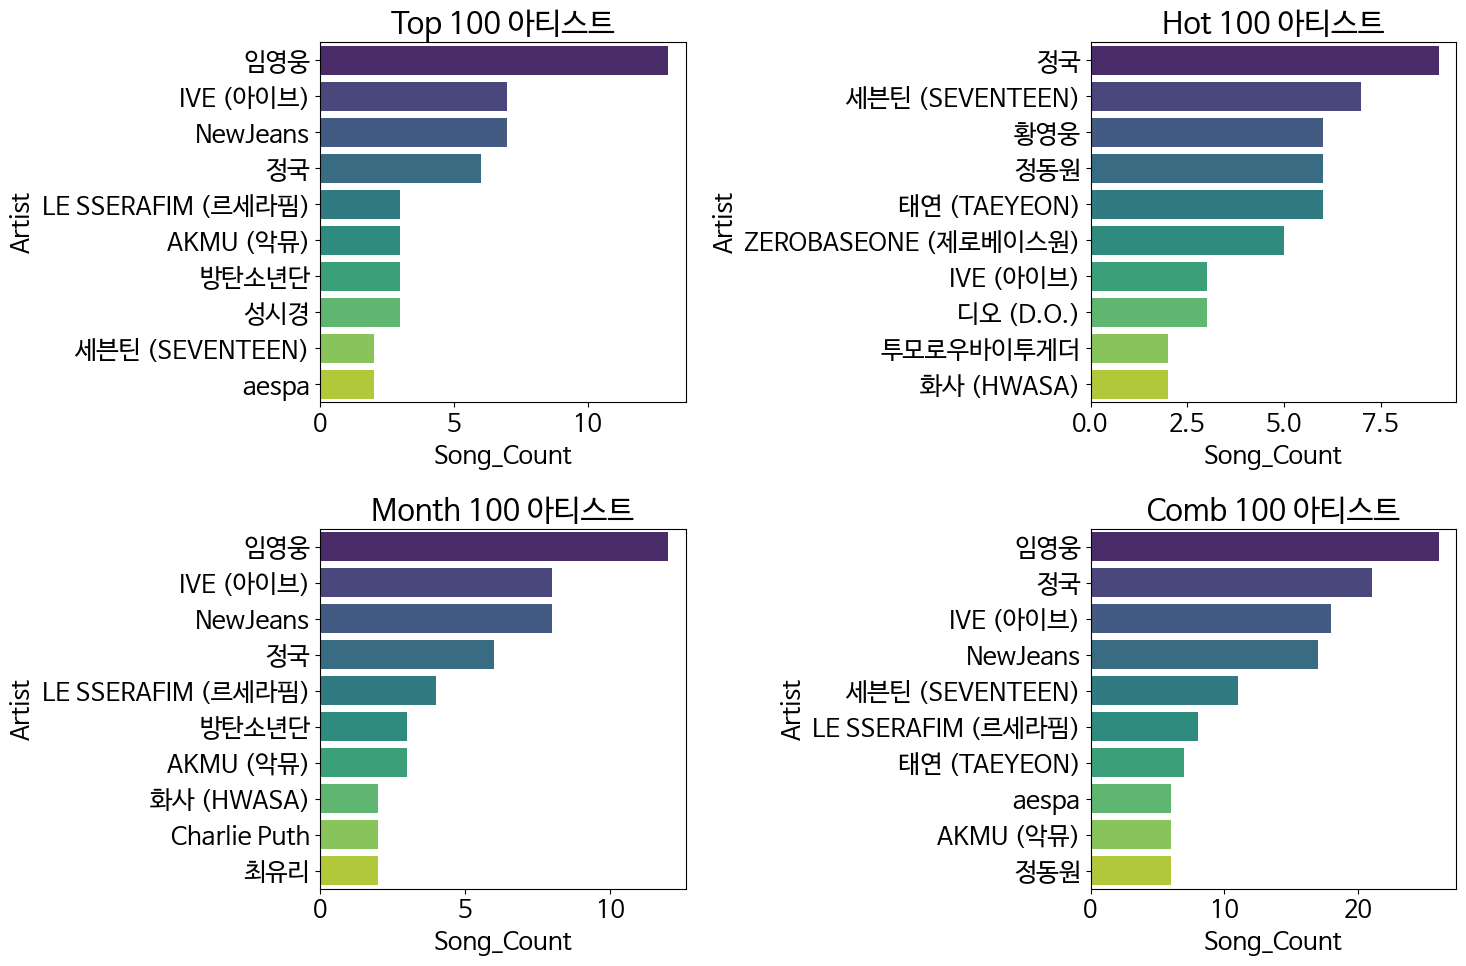

In [124]:
# 시각화

import seaborn as sns

#(top100 아티스트)
top_artists = top_artist_count.head(10)
#(hot100 아티스트)
hot_artists = hot_artist_count.head(10)
#(month100 아티스트)
month_artists = month_artist_count.head(10)
#(comb100 아티스트)
comb_artists = comb_artist_count.head(10)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 각각의 그래프 설정
sns.barplot(x='Song_Count', y='Artist', data=top_artists, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Top 100 아티스트')

sns.barplot(x='Song_Count', y='Artist', data=hot_artists, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Hot 100 아티스트')

sns.barplot(x='Song_Count', y='Artist', data=month_artists, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Month 100 아티스트')

sns.barplot(x='Song_Count', y='Artist', data=comb_artists, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Comb 100 아티스트')

# 간격 조정
plt.tight_layout()

# 그림을 이미지 파일로 저장
plt.savefig('combined_artists_graph.png')

# 그림 보여주기
plt.show()



# **결론**

Top100 정보를 보아 현재
아이돌 쪽의 노래가 대중적으로 가장 많은 관심을 보입니다.

Hot100 의 트로트 쪽의 스트리밍 수를 보아 팬층이 두껍다는 것을 알 수 있었습니다.

또한 악동 뮤지션이나 화사를 보았을 때,  sns의 챌린지 영상이 멜론 순위에 영향을 줄 수 있구나 생각했습니다.

전체적인 차트를 보았을 경우 결국 팬층에 따라 차트에 진입하는 노래의 수가 결정된다는 것을 알 수 있습니다.
